In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# TASK 1: POPULATION & SAMPLING

In [4]:
# Load the dataset
df = pd.read_csv('sale_data.csv')
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [5]:
# Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [6]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [7]:
# Treat the full dataset as Population
population_df = df.copy()

In [8]:
# Create a Sample dataset using Simple Random Sampling
sample_size = 100
sample_df = population_df.sample(n=sample_size, random_state=42)

In [9]:
# Display Population size and Sample size
population_size = population_df.shape[0]
print("Population Size:", population_size)
print("Sample Size:", sample_df.shape[0])

Population Size: 1000
Sample Size: 100


# TASK 2: SAMPLING TECHNIQUES

In [11]:
# Create Random Sample
sample_size = 100
sample_df = population_df.sample(n=sample_size, random_state=42)
print(f'Size is', sample_df.shape[0])
sample_df.head()

Size is 100


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
521,1100,2023-05-23,Bob,West,7667.96,29,Food,3559.56,3607.15,Returning,0.21,Cash,Retail,West-Bob
737,1031,2023-03-23,Eve,East,433.40,32,Clothing,3351.33,3711.47,New,0.16,Cash,Retail,East-Eve
740,1003,2023-07-25,Eve,West,5617.64,5,Food,2206.58,2490.47,New,0.28,Cash,Online,West-Eve
660,1017,2023-12-23,Alice,East,780.27,33,Food,1551.25,1994.01,Returning,0.08,Cash,Online,East-Alice
411,1042,2023-05-26,Bob,East,848.28,1,Electronics,1406.24,1535.57,New,0.08,Credit Card,Retail,East-Bob


In [12]:
# Create Systematic Sample (every nth record)
n = 10  # Every 10th record
systematic_sample_df = population_df.iloc[::n]
print(f'Size is', systematic_sample_df.shape[0])
systematic_sample_df.head()

Size is 100


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
10,1088,2023-11-16,Eve,North,8518.45,13,Furniture,2440.11,2517.60,New,0.23,Bank Transfer,Retail,North-Eve
20,1002,2023-04-22,Eve,North,6551.23,9,Electronics,4398.16,4439.12,New,0.18,Bank Transfer,Online,North-Eve
30,1091,2023-09-04,Charlie,South,675.11,44,Food,2085.46,2406.58,Returning,0.06,Bank Transfer,Retail,South-Charlie
40,1062,2023-03-16,David,West,4195.06,45,Furniture,4849.60,5166.72,Returning,0.25,Credit Card,Online,West-David


In [13]:
# Compare Mean of population and Mean of samples

# Assuming we're using 'Sales_Amount' as the numerical column for means
population_mean = population_df['Sales_Amount'].mean()

print("Population Mean (Sales_Amount):", population_mean)
population_df['Sales_Amount'].head()

Population Mean (Sales_Amount): 5019.265229999999


0    5053.97
1    4384.02
2    4631.23
3    2167.94
4    3750.20
Name: Sales_Amount, dtype: float64

In [14]:
random_sample_mean = sample_df['Sales_Amount'].mean()

print("Random Sample Mean (Sales_Amount):", random_sample_mean)
sample_df['Sales_Amount'].head()

Random Sample Mean (Sales_Amount): 5073.0229


521    7667.96
737     433.40
740    5617.64
660     780.27
411     848.28
Name: Sales_Amount, dtype: float64

In [15]:
systematic_sample_mean = systematic_sample_df['Sales_Amount'].mean()

print("Systematic Sample Mean (Sales_Amount):", systematic_sample_mean)
systematic_sample_df['Sales_Amount'].head()

Systematic Sample Mean (Sales_Amount): 4499.2767


0     5053.97
10    8518.45
20    6551.23
30     675.11
40    4195.06
Name: Sales_Amount, dtype: float64

In [16]:
# Write a short note on Difference between population and sample results
print("Note on Difference:")
print("""The population mean represents the true average of all data points. Sample means approximate this but may differ due to sampling variability. 
Random sampling tends to be unbiased, while systematic sampling might introduce bias if there's a pattern every nth row. In this case, the differences 
are small, indicating good representation.""")

Note on Difference:
The population mean represents the true average of all data points. Sample means approximate this but may differ due to sampling variability. 
Random sampling tends to be unbiased, while systematic sampling might introduce bias if there's a pattern every nth row. In this case, the differences 
are small, indicating good representation.


# TASK 3: CENTRAL LIMIT THEOREM (CLT)

In [18]:
# Take multiple samples of size 30
num_samples = 1000  # Number of samples
sample_means = []

In [19]:
# Calculate the mean of each sample 
for _ in range(num_samples):
    sample = population_df['Sales_Amount'].sample(n=30, random_state=np.random.randint(10000))
    sample_means.append(sample.mean())

In [20]:
# Store sample means
sample_means_df = pd.DataFrame({'Sample_Mean': sample_means})

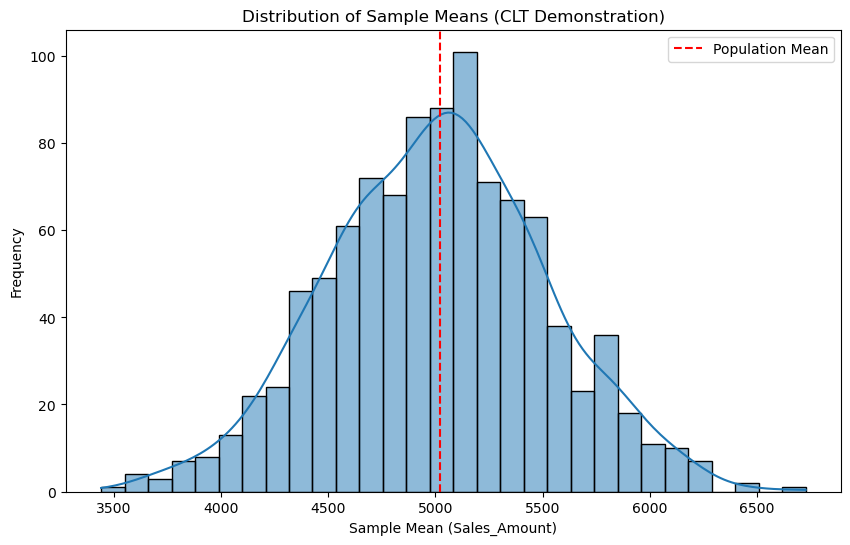

In [21]:
# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_df['Sample_Mean'], kde=True, bins=30)
plt.title('Distribution of Sample Means (CLT Demonstration)')
plt.xlabel('Sample Mean (Sales_Amount)')
plt.ylabel('Frequency')
plt.axvline(population_mean, color='r', linestyle='--', label='Population Mean')
plt.legend()
plt.show()

In [22]:
# Observe and explain
print("Observation on Distribution:")
print("""The distribution of sample means is approximately normal (bell-shaped), centered around the population mean. This holds even if the 
original data isn't normal, as per CLT.""")

Observation on Distribution:
The distribution of sample means is approximately normal (bell-shaped), centered around the population mean. This holds even if the 
original data isn't normal, as per CLT.


In [23]:
print("Relation to CLT:")
print("""CLT states that for large enough sample sizes (n=30 here), the sampling distribution of the mean approaches a normal distribution, 
regardless of the population's distribution. This enables inference about the population from samples.""")

Relation to CLT:
CLT states that for large enough sample sizes (n=30 here), the sampling distribution of the mean approaches a normal distribution, 
regardless of the population's distribution. This enables inference about the population from samples.


# TASK 4: NORMAL DISTRIBUTION ANALYSIS

In [25]:
# Using 'Sales_Amount' column
column = 'Sales_Amount'

In [26]:
# Calculate Mean and Standard Deviation
mean = population_df[column].mean()
std_dev = population_df[column].std()

print("Mean (Sales_Amount):", mean)
print("Standard Deviation (Sales_Amount):", std_dev)

Mean (Sales_Amount): 5019.265229999999
Standard Deviation (Sales_Amount): 2846.7901256682326


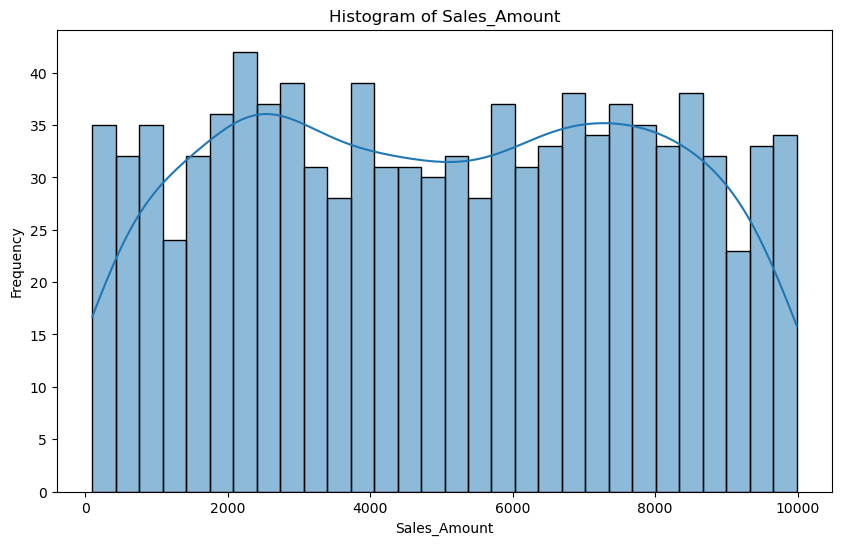

In [27]:
# Plot Histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(population_df[column], kde=True, bins=30)
plt.title('Histogram of Sales_Amount')
plt.xlabel('Sales_Amount')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Normality test (Shapiro-Wilk on full data since n=1000 ≤ 5000)
stat, p_value = stats.shapiro(population_df[column])
print(f"Shapiro-Wilk Test p-value: {p_value:.2e}")
print("Data does not appear normal (p-value << 0.05). The distribution is likely uniform or close to uniform based on the range and stats.")

Shapiro-Wilk Test p-value: 5.78e-17
Data does not appear normal (p-value << 0.05). The distribution is likely uniform or close to uniform based on the range and stats.


In [29]:
# 68-95-99.7 rule check
within_1sd = np.mean((population_df[column] >= mean - std_dev) & (population_df[column] <= mean + std_dev)) * 100
within_2sd = np.mean((population_df[column] >= mean - 2*std_dev) & (population_df[column] <= mean + 2*std_dev)) * 100
within_3sd = np.mean((population_df[column] >= mean - 3*std_dev) & (population_df[column] <= mean + 3*std_dev)) * 100

print("68-95-99.7 Rule Results (for reference):")
print(f"Within 1 SD: {within_1sd:.2f}% (Normal expects ~68%)")
print(f"Within 2 SD: {within_2sd:.2f}% (Normal expects ~95%)")
print(f"Within 3 SD: {within_3sd:.2f}% (Normal expects ~99.7%)")
print("Deviations confirm the data is not normally distributed (closer to uniform behavior).")

68-95-99.7 Rule Results (for reference):
Within 1 SD: 58.60% (Normal expects ~68%)
Within 2 SD: 100.00% (Normal expects ~95%)
Within 3 SD: 100.00% (Normal expects ~99.7%)
Deviations confirm the data is not normally distributed (closer to uniform behavior).


# TASK 5: Z-SCORE CALCULATION

In [31]:
population_df['Z_Score'] = (population_df[column] - mean) / std_dev

population_df['Outlier'] = np.where((population_df['Z_Score'].abs() > 3), 'Yes', 'No')

print("Number of Outliers (|Z| > 3):", (population_df['Outlier'] == 'Yes').sum())
if (population_df['Outlier'] == 'Yes').sum() > 0:
    print(population_df[population_df['Outlier'] == 'Yes'][['Product_ID', column, 'Z_Score']])
else:
    print("No extreme outliers detected.")

Number of Outliers (|Z| > 3): 0
No extreme outliers detected.


# TASK 6: BUSINESS INSIGHTS

In [33]:
print("Business Insights:\n")

print("1. Why is sampling required in real-world data analysis?")
print("   Sampling saves time and resources when the full population is too large to analyze. "
      "It provides reliable insights if done properly.")

print("2. How does CLT help in analytics?")
print("   CLT allows us to use normal-based statistics (like confidence intervals) on sample means, "
      "even if the original data isn't normal, making inference easier.")

print("3. Why is normal distribution important before hypothesis testing?")
print("   Many tests assume normality for accurate results. If data isn't normal, we may need transformations "
      "or non-parametric tests to avoid wrong conclusions.")

print("4. How does Z-Score help in identifying unusual values?")
print("   Z-Score shows how far a value is from the mean in standard deviations. "
      "Values with |Z| > 3 are rare and flagged as potential outliers for review.")

Business Insights:

1. Why is sampling required in real-world data analysis?
   Sampling saves time and resources when the full population is too large to analyze. It provides reliable insights if done properly.
2. How does CLT help in analytics?
   CLT allows us to use normal-based statistics (like confidence intervals) on sample means, even if the original data isn't normal, making inference easier.
3. Why is normal distribution important before hypothesis testing?
   Many tests assume normality for accurate results. If data isn't normal, we may need transformations or non-parametric tests to avoid wrong conclusions.
4. How does Z-Score help in identifying unusual values?
   Z-Score shows how far a value is from the mean in standard deviations. Values with |Z| > 3 are rare and flagged as potential outliers for review.
